# 0. Imports

### Standard imports

In [17]:
import numpy as np 
import pandas as pd 
import tqdm as tqdm 
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

In [3]:
# import os
# os.chdir('DLSP-DENOISING')
# print(os.getcwd())

/Users/Corentin/Desktop/MVA 2024-2025/Deep Learning et traitement du signal/projet_final/dlsp-denoising


### Project imports

In [4]:
from src.libs.preprocessing import DataLoader
from src.libs.visualization import DataVisualizer

# 1. Load and read the data

In [9]:
# data path
path_train_x = "data/input/denoising/train_small"
path_train_y = "data/input/voice_origin/train_small"

In [10]:
data_loader = DataLoader(path_x=path_train_x, path_y=path_train_y)

Import summary:
- Data imported successfully!
- Number of noised samples: 10
- Number of original samples: 10
- Signal shapes in noised samples: [80000]
- Signal shapes in original samples: [40000]
- Correspondance between both data sets: True.


# 2.Visualization

In [11]:
visualizer = DataVisualizer(data_loader)

## 2.a Playing some sounds

In [12]:
# chose at random an extract to read
sequence = np.random.choice(list(data_loader.data_x.keys()))

In [15]:
# listen to the extract without noise
visualizer.play_wav(sequence, noised=False)

Sampling frequency: 4000 Hz
Dimension: (40000,)


In [16]:
visualizer.play_wav(sequence, noised=True)

Sampling frequency: 8000 Hz
Dimension: (80000,)


### La fréquence d'échantillonnage du signal avec bruit est 2 fois plus importante que celle du signal sans bruit,
### Les signaux n'ont pas les mêmes formats float32, int16, et n'ont pas la même échelle non plus ==> normalisation  

## 2.b Affichage d'un même signal 

In [39]:
# Charger les signaux
voice_origin_data = []
for i in range(10):
    file_path = f'data/input/voice_origin/train_small/Jules_Verne_-_L_ile_mysterieuse_Partie1_Chap01_{i}_.wav'
    f_e, data = wavfile.read(file_path)
    voice_origin_data.append((f_e, data))

denoising_data = []
for i in range(10):
    file_path = f'data/input/denoising/train_small/Jules_Verne_-_L_ile_mysterieuse_Partie1_Chap01_{i}_.wav'
    f_e, data = wavfile.read(file_path)
    denoising_data.append((f_e, data))

In [40]:
print(voice_origin_data[:2])
print(denoising_data[:2])

[(4000, array([  0,   0,   0, ...,  -8, -14, -15], dtype=int16)), (4000, array([-15,  -7, -25, ..., 443, 278, 102], dtype=int16))]
[(8000, array([0.00063418, 0.0004545 , 0.00113096, ..., 0.00166059, 0.00116693,
       0.00096299], dtype=float32)), (8000, array([0.01598259, 0.01505869, 0.0144542 , ..., 0.01987156, 0.01770124,
       0.01887047], dtype=float32))]


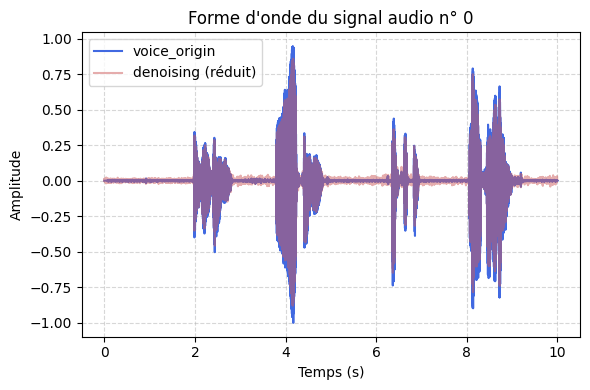

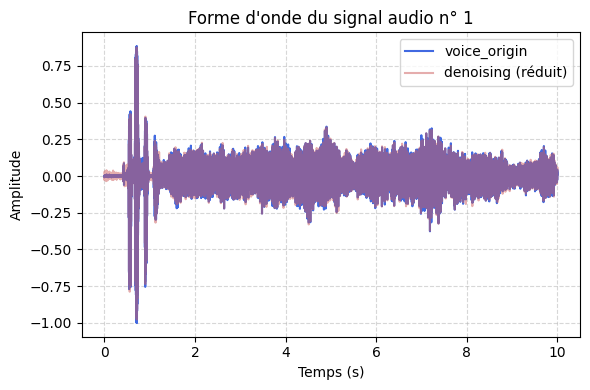

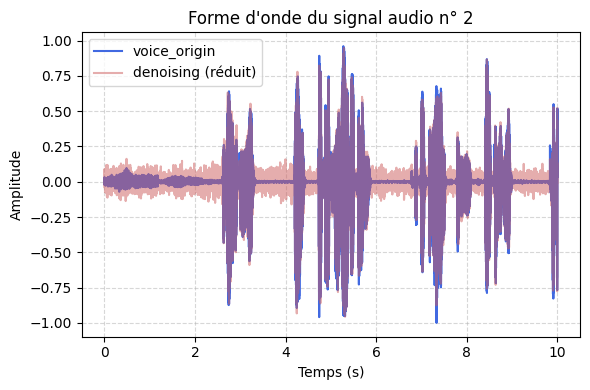

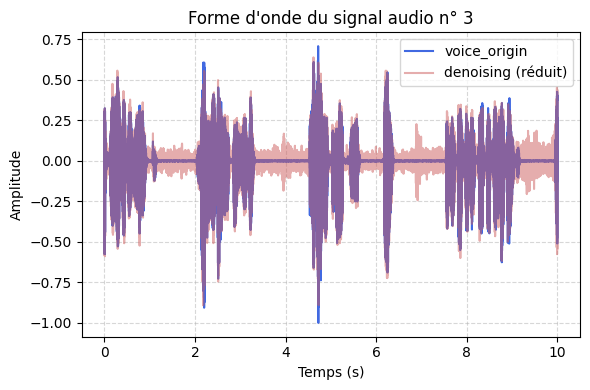

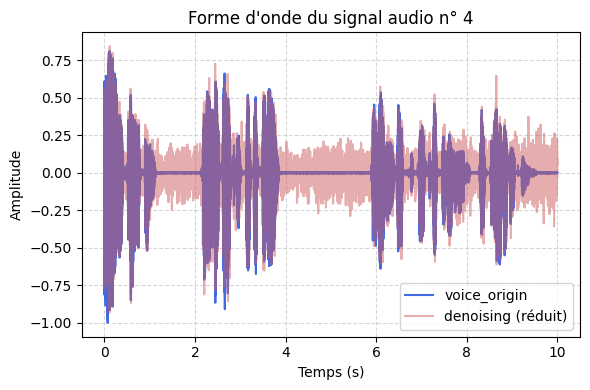

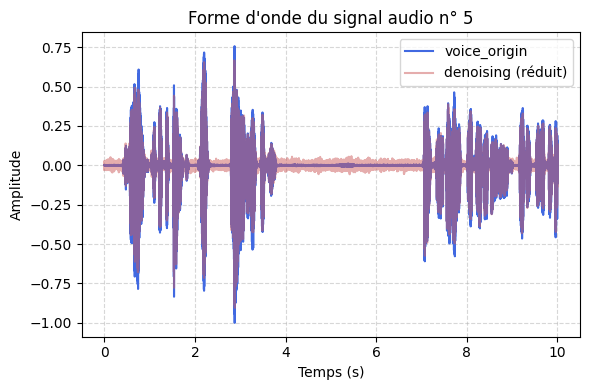

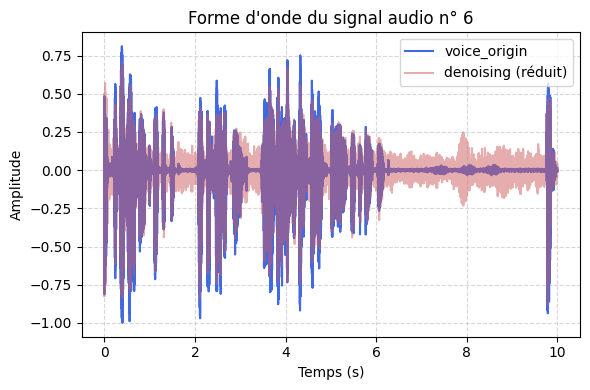

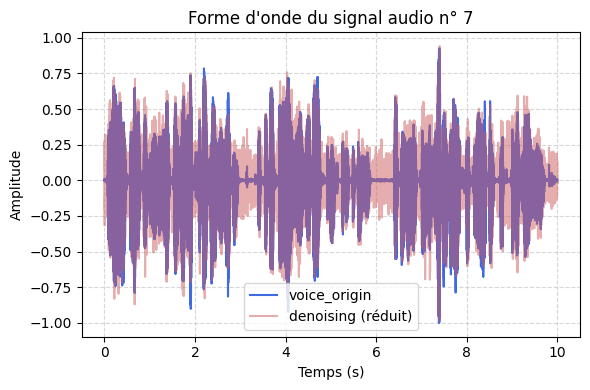

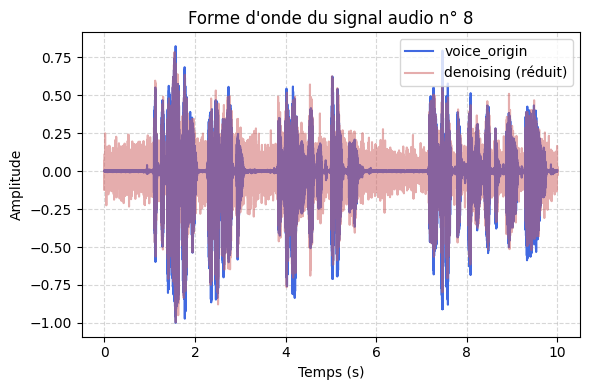

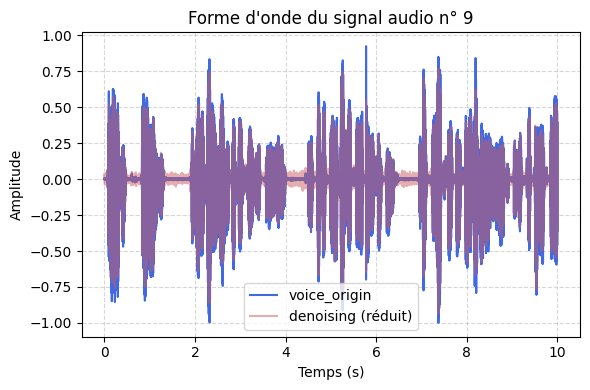

In [41]:
def downsample_by_mean(signal):
    """Réduit un signal en prenant la moyenne deux par deux."""
    if len(signal) % 2 != 0:
        signal = signal[:-1]  # Supprime le dernier point si nécessaire
    return np.mean(signal.reshape(-1, 2), axis=1)

def normalize(signal):
    """Normalise un signal pour que ses valeurs soient comprises entre -1 et 1."""
    return signal / np.max(np.abs(signal))

voice_origin_data = []
for i in range(10):
    file_path = f'data/input/voice_origin/train_small/Jules_Verne_-_L_ile_mysterieuse_Partie1_Chap01_{i}_.wav'
    f_e, data = wavfile.read(file_path)
    data = data.astype(np.float32)  # Convertir en float32 pour la normalisation
    data = normalize(data)  # Normaliser immédiatement après le chargement
    voice_origin_data.append((f_e, data))

denoising_data = []
for i in range(10):
    file_path = f'data/input/denoising/train_small/Jules_Verne_-_L_ile_mysterieuse_Partie1_Chap01_{i}_.wav'
    f_e, data = wavfile.read(file_path)
    data = data.astype(np.float32)  # Convertir en float32 pour la normalisation
    data = normalize(data)  # Normaliser immédiatement après le chargement
    denoising_data.append((f_e, data))

for i in range(len(voice_origin_data)):
    voice_origin_f_e, voice_origin_signal = voice_origin_data[i]
    denoising_f_e, denoising_signal = denoising_data[i]

    # Vérifier si la fréquence de denoising est 8000 Hz
    if abs(denoising_f_e - 8000) <= 1:  # Vérifie la fréquence avec tolérance
        reduced_denoising_signal = downsample_by_mean(denoising_signal)
        reduced_denoising_f_e = denoising_f_e // 2
    else:
        raise ValueError(f"La fréquence d'échantillonnage de denoising ({denoising_f_e} Hz) n'est pas celle attendue (8000 Hz).")

    # Création de l'axe temporel pour voice_origin et denoising
    time_denoising = np.linspace(0, len(reduced_denoising_signal) / reduced_denoising_f_e, num=len(reduced_denoising_signal))
    time_voice_origin = np.linspace(0, len(voice_origin_signal) / voice_origin_f_e, num=len(voice_origin_signal))

    # Tracé des signaux
    plt.figure(figsize=(6, 4))
    plt.plot(time_voice_origin, voice_origin_signal, color='royalblue', label="voice_origin")
    plt.plot(time_denoising, reduced_denoising_signal, color='indianred', label="denoising (réduit)", alpha=0.5)
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Forme d\'onde du signal audio n° {i}')
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()


## 2.b Displaying the time serie

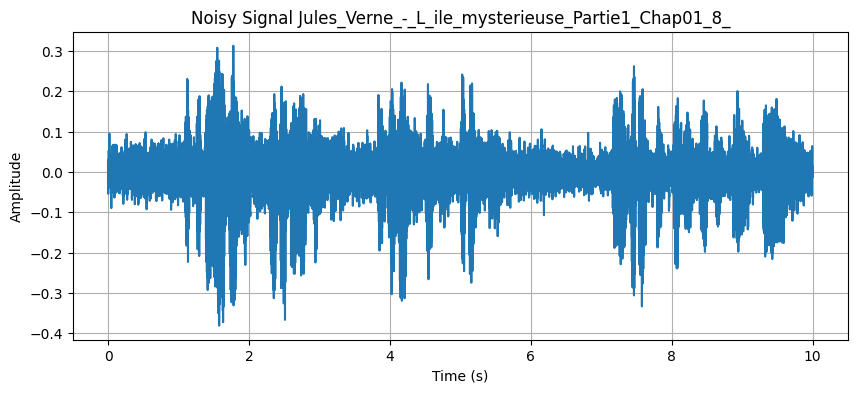

In [35]:
visualizer.display_signal(sequence, noised=True)

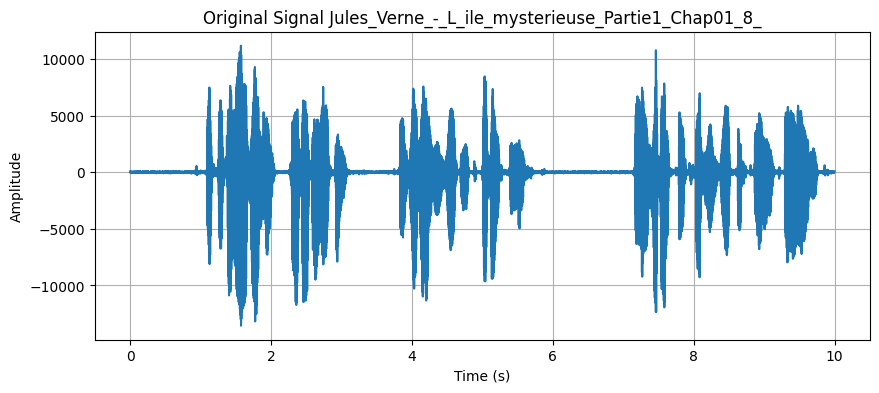

In [36]:
visualizer.display_signal(sequence, noised=False)

## 2.c Display Spectrogram

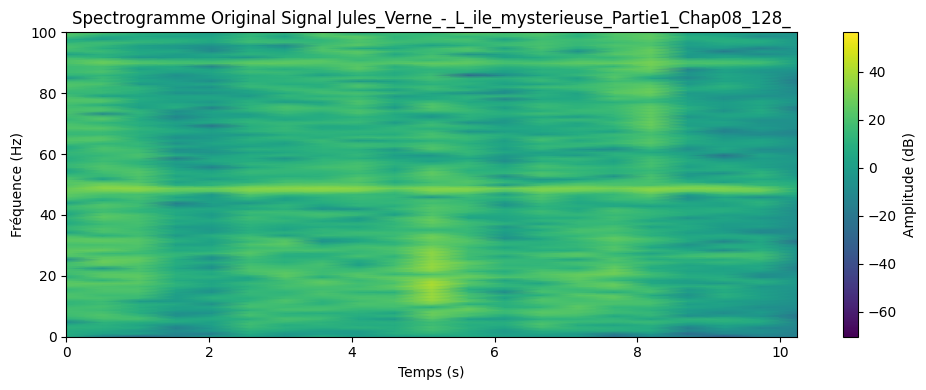

In [49]:
visualizer.display_spectrogram(sequence, noised=False)

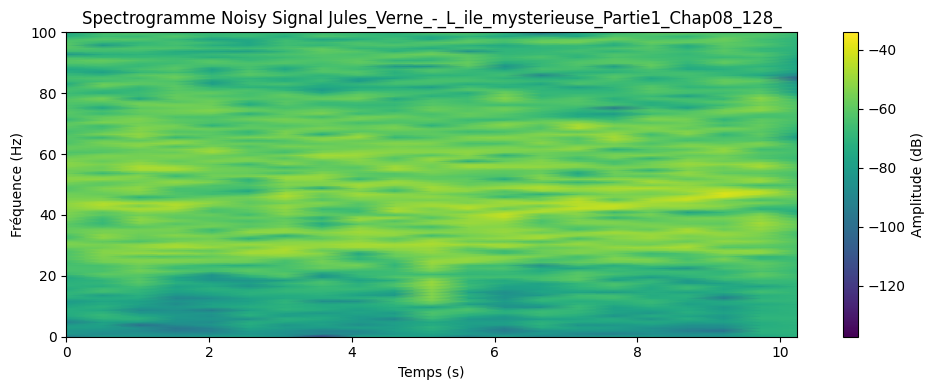

In [48]:
visualizer.display_spectrogram(sequence, noised=True, nperseg=2**13)